In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
%matplotlib inline
sns.set_style("whitegrid")

In [11]:
# Helper methods
# Get the confusion matrix
def get_confusion_matrix(y_test, y_train):
  confusion_mat = confusion_matrix(y_test, y_pred)

  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  confusion_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      confusion_mat.flatten()/np.sum(confusion_mat)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  
  plt.subplots(figsize = (8,6))
  sns.heatmap(confusion_mat, annot=labels, fmt="")

  return confusion_mat

# Get Accuracy, Precision, Recall, F1-Score
def get_model_eval_scores(confusion_mat):
  
  # sum of diagonals divided by total
  accuracy = np.trace(confusion_mat) / float(np.sum(confusion_mat))
  
  # if the confusion matrix is binary
  if len(confusion_mat)==2:
    #Metrics for Binary Confusion Matrices
    precision = confusion_mat[1,1] / sum(confusion_mat[:,1])
    recall    = confusion_mat[1,1] / sum(confusion_mat[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    return f"Accuracy:{accuracy} | Precision:{precision} | Recall:{recall} | F1 Score:{f1_score}"
  else:
    return f"Accuracy:{accuracy}"


In [3]:
# read csv

loan_data = pd.read_csv('loan_data.csv')
loan_data

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9572              0  debt_consolidation    0.1565        69.98   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9572       10.110472   7.02   662        8190.041667       2999        39.5   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9572               6            0        0               1  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  

[9577 rows x 14 columns]

In [4]:
# check for null values

loan_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9577 non-null   int64  
 1   purpose            9577 non-null   object 
 2   int.rate           9577 non-null   float64
 3   installment        9577 non-null   float64
 4   log.annual.inc     9577 non-null   float64
 5   dti                9577 non-null   float64
 6   fico               9577 non-null   int64  
 7   days.with.cr.line  9577 non-null   float64
 8   revol.bal          9577 non-null   int64  
 9   revol.util         9577 non-null   float64
 10  inq.last.6mths     9577 non-null   int64  
 11  delinq.2yrs        9577 non-null   int64  
 12  pub.rec            9577 non-null   int64  
 13  not.fully.paid     9577 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# data description

loan_data.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9577.000000  9577.000000  9577.000000     9577.000000  9577.000000   
mean        0.805054     0.122638   319.033619       10.932082    12.606295   
std         0.396180     0.026848   207.010102        0.614835     6.884227   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.210000   
50%         1.000000     0.122100   268.950000       10.928238    12.660000   
75%         1.000000     0.140700   432.350000       11.291780    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9577.000000        9577.000000  9.577000e+03  9577.000000   
mean    710.844106        4560.748482  1.691177e+04    46.798171   
std      37.971904        2497.060076  3.375727e+04    29.015745   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824200e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9577.000000  9577.000000  9577.000000     9577.000000  
mean         1.577007     0.163726     0.062128        0.159967  
std          2.199896     0.546241     0.262139        0.366594  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

&lt;AxesSubplot:xlabel=&#39;purpose&#39;, ylabel=&#39;count&#39;&gt;

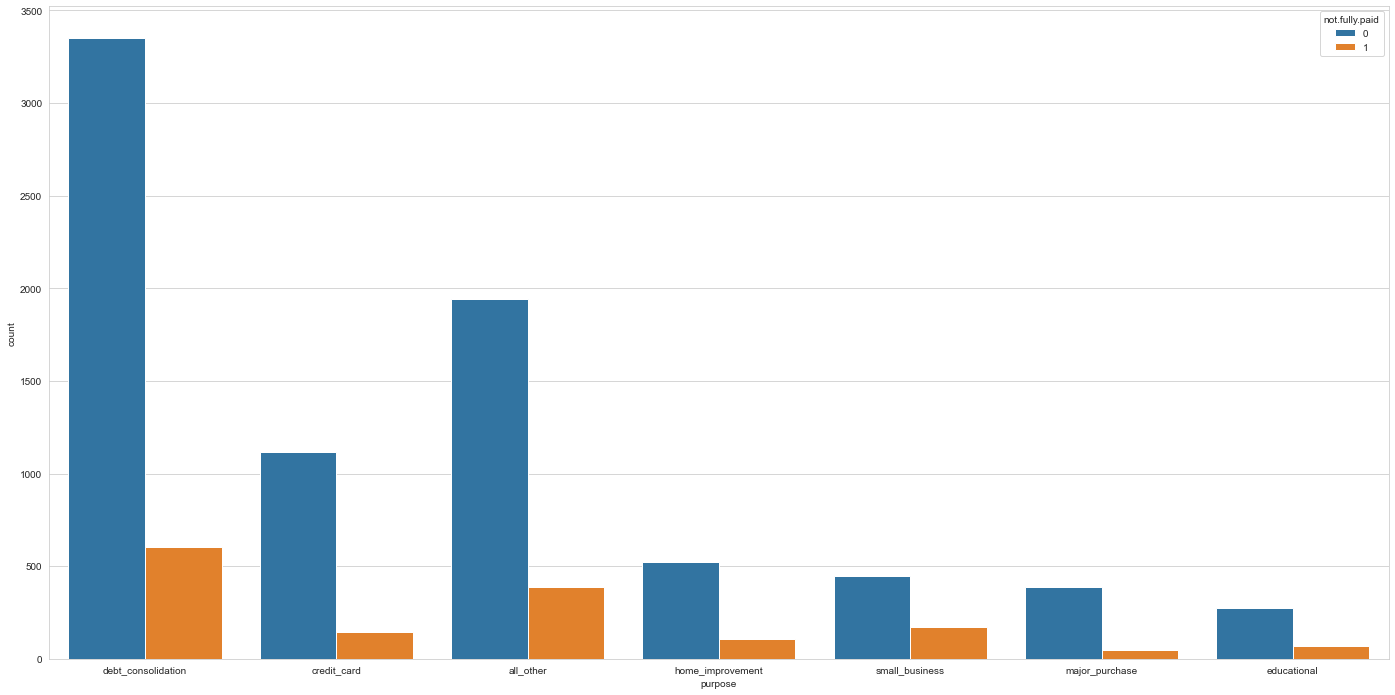

In [6]:
# analysis

plt.subplots(figsize = (24,12))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loan_data)

Text(0, 0.5, &#39;Count&#39;)

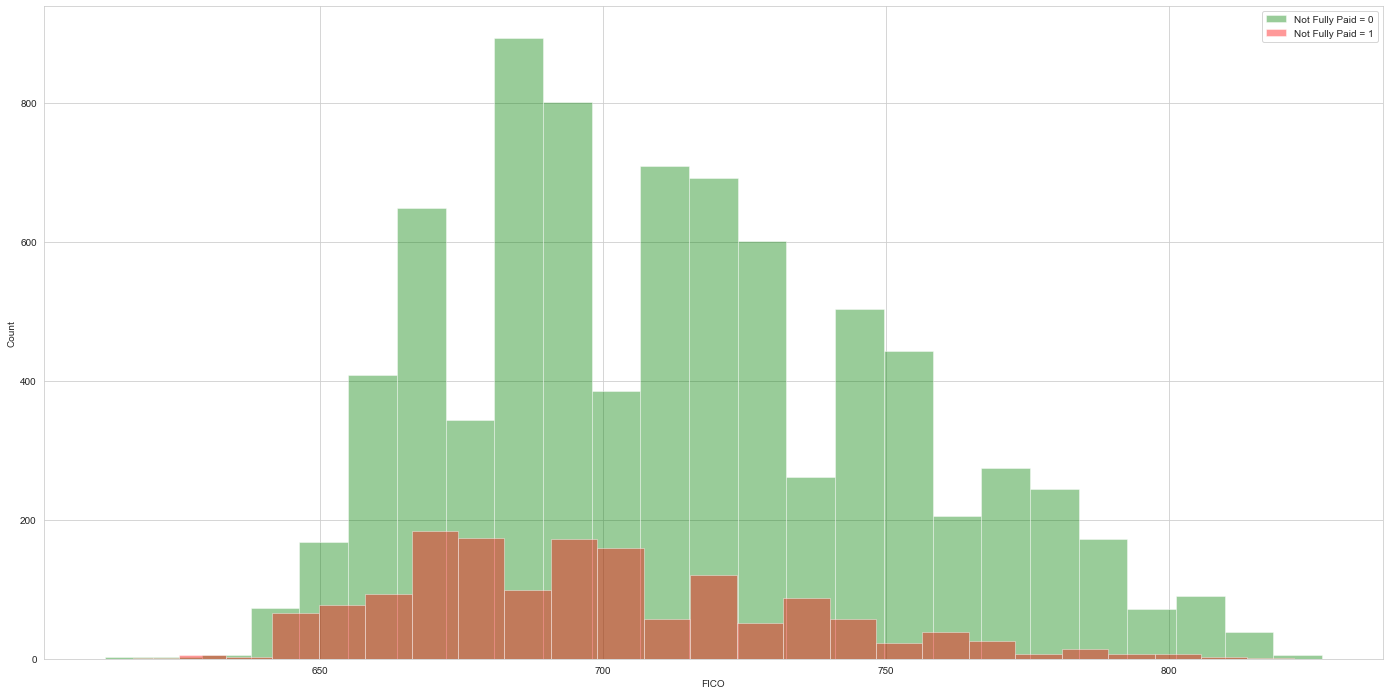

In [7]:
plt.subplots(figsize = (24,12))
sns.distplot(loan_data[loan_data['not.fully.paid'] == 0]['fico'], bins = 25, kde = False, color = 'green', label = 'Not Fully Paid = 0')
sns.distplot(loan_data[loan_data['not.fully.paid'] == 1]['fico'], bins = 25, kde = False, color = 'red', label = 'Not Fully Paid = 1')
plt.legend()
plt.xlabel('FICO')
plt.ylabel('Count')

In [8]:
# preprocessing data

preprocessed_loan_data = pd.get_dummies(loan_data, columns = ['purpose'], drop_first = True)
preprocessed_loan_data

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9572              0    0.1565        69.98       10.110472   7.02   662   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9572        8190.041667       2999        39.5               6            0   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   

      pub.rec  not.fully.paid  purpose_credit_card  \
0           0               0                    0   
1           0               0                    1   
2           0               0                    0   
3           0               0                    0   
4           0               0                    1   
...       ...             ...                  ...   
9572        0               1                    0   
9573        0               1                    0   
9574        0               1                    0   
9575        0               1                    0   
9576        0               1                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9572                           1                    0   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9572                         0                       0                       0  
9573                         0                       0                       0  
9574                         0                       0                       0  
9575        

In [9]:
# splitting the dataset into train and test sets

X = preprocessed_loan_data.drop('not.fully.paid', axis = 1)
y = preprocessed_loan_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 123)

Accuracy: 0.7383437717466945


&#39;Accuracy:0.7383437717466945 | Precision:0.21169354838709678 | Recall:0.22532188841201717 | F1 Score:0.2182952182952183&#39;

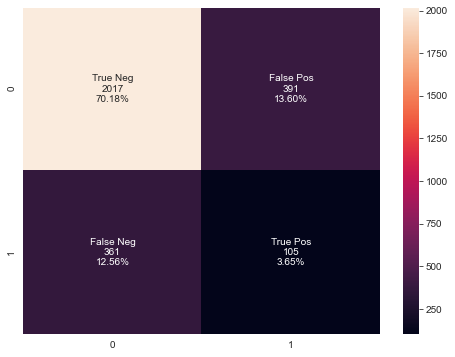

In [12]:
# Initialize the Decision tree classifier with Gini criterion
decision_tree = DecisionTreeClassifier(criterion='gini')

# Train 
decision_tree = decision_tree.fit(X_train, y_train)

# Predict 
y_pred = decision_tree.predict(X_test)

# Evaluate
print("Accuracy:",accuracy_score(y_test, y_pred))

confusion_mat = get_confusion_matrix(y_test, y_pred)
scores = get_model_eval_scores(confusion_mat)
scores



In [13]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=loan_data['purpose'].unique(),
                                filled=True)

# Draw decision tree
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_gini")
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.609948 to fit


Accuracy: 0.7484342379958246


&#39;Accuracy:0.7484342379958246 | Precision:0.23173277661795408 | Recall:0.23819742489270387 | F1 Score:0.23492063492063495&#39;

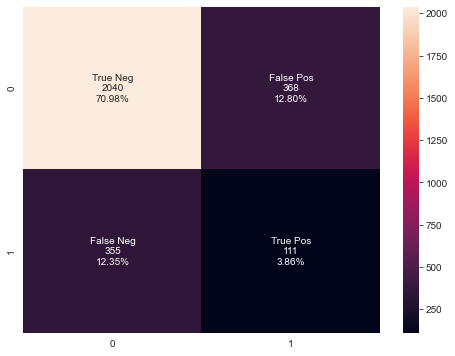

In [15]:
# Initialize the Decision tree classifier with Entropy criterion
decision_tree = DecisionTreeClassifier(criterion='entropy')

# Train 
decision_tree = decision_tree.fit(X_train, y_train)

# Predict 
y_pred = decision_tree.predict(X_test)

# Evaluate
print("Accuracy:",accuracy_score(y_test, y_pred))

confusion_mat = get_confusion_matrix(y_test, y_pred)
scores = get_model_eval_scores(confusion_mat)
scores

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.744721 to fit


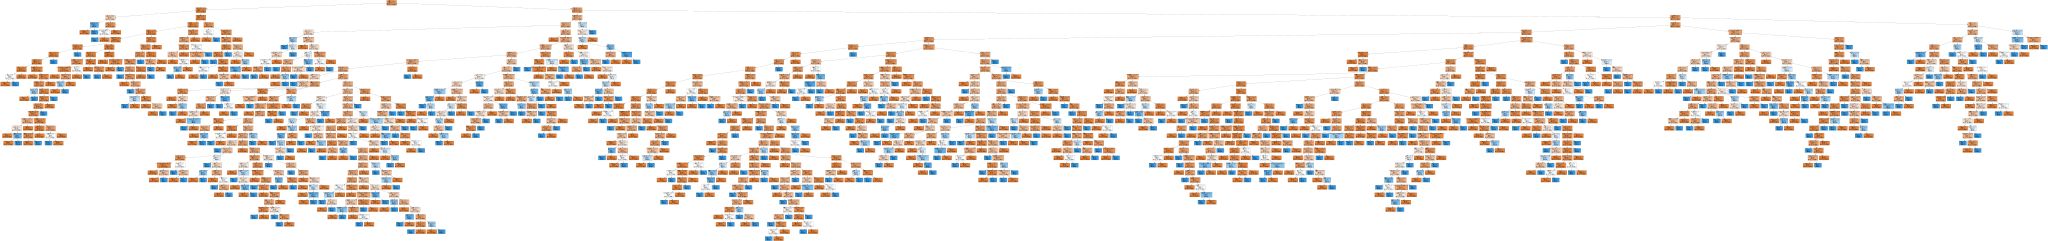

In [16]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=loan_data['purpose'].unique(),
                                filled=True)

# Draw decision tree
graph = graphviz.Source(dot_data, format="png", filename='decision_tree_entropy.png') 
graph.render('decision_tree_entropy')
graph